In [ ]:
# Installation des dépendances (décommenter si nécessaire)
# !pip install kagglehub[pandas-datasets]
# !pip install pandas

import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
from typing import Optional

def load_ai_impact_data(file_path: str = "ai_impact_on_jobs_2030.csv", **pandas_kwargs) -> Optional[pd.DataFrame]:
    """
    Charge un fichier CSV spécifique du dataset 'khushikyad001/ai-impact-on-jobs-2030'
    depuis Kaggle directement dans un DataFrame Pandas.

    Args:
        file_path (str): Le nom du fichier CSV à charger dans le dataset.
                         (Par défaut, 'ai_impact_on_jobs_2030.csv', le fichier principal.)
        **pandas_kwargs: Arguments supplémentaires passés directement à la fonction
                         de lecture Pandas (ex: sep, header, index_col, etc.).

    Returns:
        Optional[pd.DataFrame]: Le DataFrame Pandas chargé, ou None en cas d'erreur.
    """
    # Constantes pour la clarté et la maintenabilité
    KAGGLE_REF = "khushikyad001/ai-impact-on-jobs-2030"

    if not file_path:
        print("❌ Erreur : Le chemin du fichier (file_path) ne peut pas être vide.")
        return None

    print(f"🤖 Tentative de chargement du fichier '{file_path}' du dataset Kaggle : {KAGGLE_REF}...")

    try:
        # Appel à l'API de chargement en utilisant l'adaptateur PANDAS
        df = kagglehub.load_dataset(
            model_reference=KaggleDatasetAdapter.PANDAS,
            ref=KAGGLE_REF,
            path=file_path,
            pandas_kwargs=pandas_kwargs
        )

        print("\n✅ Chargement réussi.")
        print("---")
        return df

    except Exception as e:
        print(f"\n❌ Erreur lors du chargement du dataset : {e}")
        print("Vérifiez la connexion, l'installation de 'kagglehub[pandas-datasets]' et la référence.")
        return None

# --- Exécution du code ---

# 3. Appel de la fonction pour exécuter le chargement

# Le nom de fichier principal est défini par défaut dans la fonction,
# mais il est explicité ici pour la clarté.
NOM_FICHIER = "ai_impact_on_jobs_2030.csv"

df_ai_jobs = load_ai_impact_data(file_path=NOM_FICHIER)

# 4. Affichage du résultat si le chargement a réussi
if df_ai_jobs is not None:
    print("Type de l'objet chargé :", type(df_ai_jobs))
    print("Shape du DataFrame :", df_ai_jobs.shape)
    print("\nPremières 5 lignes :")
    print(df_ai_jobs.head())

🤖 Tentative de chargement du fichier 'ai_impact_on_jobs_2030.csv' du dataset Kaggle : khushikyad001/ai-impact-on-jobs-2030...

❌ Erreur lors du chargement du dataset : load_dataset() got an unexpected keyword argument 'model_reference'
Vérifiez la connexion, l'installation de 'kagglehub[pandas-datasets]' et la référence.


✅ DataFrame 'df' simulé pour l'analyse.


/tmp/ipython-input-657384088.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


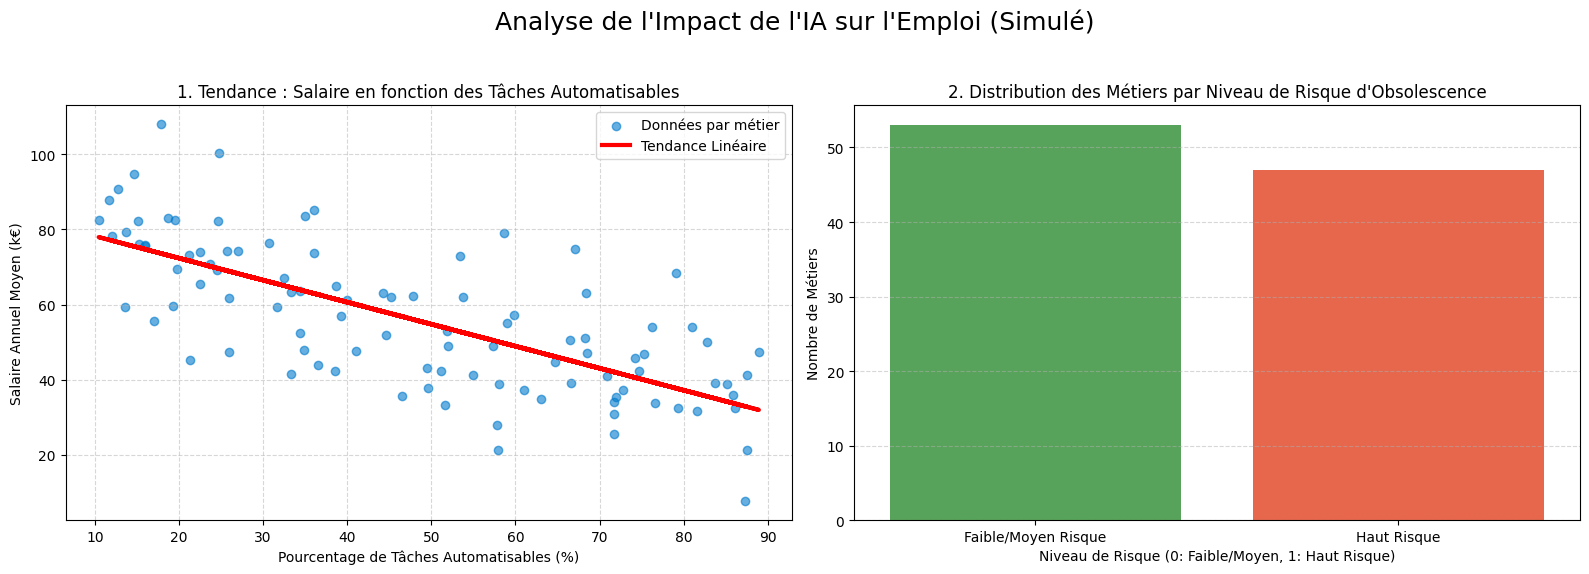

In [ ]:
# --- ÉTAPE 1 : INSTALLATION & IMPORTS NÉCESSAIRES ---
# Assurez-vous d'avoir installé ces librairies dans votre environnement Colab:
# !pip install scikit-learn matplotlib pandas numpy seaborn

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# --- ÉTAPE 2 : SIMULATION DES DONNÉES (REMplace le chargement de Kaggle) ---

# Simulation d'un DataFrame 'df' typique d'un dataset sur l'impact de l'IA
np.random.seed(42)
n_jobs = 100

# Pourcentage de tâches automatisables (0 à 100%)
df = pd.DataFrame()
df['Taches_Automatisees_Pct'] = np.random.rand(n_jobs) * 80 + 10

# Salaire Annuel Moyen (en K€)
# Hypothèse : Moins de tâches automatisées = Salaire potentiellement plus élevé (pour l'exemple)
df['Salaire_Moyen_kE'] = 80 - 0.5 * df['Taches_Automatisees_Pct'] + np.random.randn(n_jobs) * 15

# Catégorie de risque d'obsolescence (Binaire : 0=Faible/Moyen Risque, 1=Haut Risque)
# Hypothèse : Tâches automatisées > 50% => Haut Risque
df['Haut_Risque_Obsolescence'] = (df['Taches_Automatisees_Pct'] > 50).astype(int)

print("✅ DataFrame 'df' simulé pour l'analyse.")

# --- ÉTAPE 3 : ANALYSE ET TRACÉ DES GRAPHES ---

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Analyse de l\'Impact de l\'IA sur l\'Emploi (Simulé)', fontsize=18)

# =================================================================
# GRAPHE 1 : Régression Linéaire (Salaire vs. Automatisation)
# =================================================================

# Préparation du modèle Linéaire
X_lin = df[['Taches_Automatisees_Pct']].values
y_lin = df['Salaire_Moyen_kE'].values
model_linear = LinearRegression()
model_linear.fit(X_lin, y_lin)
y_lin_pred = model_linear.predict(X_lin)

# Tracé (Axe Gauche)
axes[0].scatter(X_lin, y_lin, color='#007acc', alpha=0.6, label='Données par métier')
axes[0].plot(X_lin, y_lin_pred, color='red', linewidth=3, label='Tendance Linéaire')
axes[0].set_title('1. Tendance : Salaire en fonction des Tâches Automatisables')
axes[0].set_xlabel('Pourcentage de Tâches Automatisables (%)')
axes[0].set_ylabel('Salaire Annuel Moyen (k€)')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)


# =================================================================
# GRAPHE 2 : Distribution (Risque d'Obsolescence par Catégorie)
# =================================================================

# Tracé (Axe Droit) - Utilisation d'un décompte (Count Plot) pour visualiser la proportion
sns.countplot(
    x='Haut_Risque_Obsolescence',
    data=df,
    ax=axes[1],
    palette=['#4CAF50', '#FF5733'] # Vert pour faible risque, Rouge pour haut risque
)
axes[1].set_title('2. Distribution des Métiers par Niveau de Risque d\'Obsolescence')
axes[1].set_xlabel('Niveau de Risque (0: Faible/Moyen, 1: Haut Risque)')
axes[1].set_ylabel('Nombre de Métiers')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Faible/Moyen Risque', 'Haut Risque'])
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()